In [120]:
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt

from sklearn.feature_extraction import stop_words
from nltk.corpus import stopwords

In [119]:
# read vocabulary
with open('Datasets/vocabulary.csv') as f:
    reader = csv.reader(f)
    vocab = [word for word in reader]
    
vocab = vocab[0]

In [121]:
# delete stopwords
columns = ['mxm_track_id', 'track_name', 'artist_name', 'genre']
for i in range(len(vocab)):
    if vocab[i] not in stop_words.ENGLISH_STOP_WORDS and vocab[i] not in stopwords.words('english'):
        columns.append(vocab[i])

In [123]:
# load songs and words frequencies (without stop words)
df = pd.read_csv('Datasets/combined_train2.0_english.csv', usecols=columns, converters={'genre': ast.literal_eval})

In [125]:
# load popularity from spotify
df_popularity = pd.read_csv('Datasets/train_popularity.csv', usecols=['mxm_track_id', 'popularity'])

In [129]:
# merge datasets
df = pd.merge(df, df_popularity, on='mxm_track_id')

In [132]:
# rearrange column popularity
pop_col = df.pop('popularity')
df.insert(4, 'popularity', pop_col)

In [134]:
# count songs in each genre
from collections import Counter

genres = {} # {genre: count}

def count_genres(genreList):
    for genre in genreList:
        name = genre['genre_name']
        if name not in genres.keys():
            genres[name] = 1
        else:
            genres[name] += 1

df['genre'].apply(count_genres)

genres_rank = Counter(genres).most_common()

In [136]:
# add binary columns representing genres 
columns = [t[0].upper() for t in genres_rank]
df_genre = pd.DataFrame(columns=columns, index=np.arange(len(df)))

i = 0
def make_binary_genres(genreList):
    global i
    for genre in genreList:
        g = genre['genre_name'].upper()
        df_genre.at[i, g] = 1

    i += 1

df['genre'].apply(make_binary_genres)
df_genre.fillna(0, inplace=True)

### Wordcloud

In [212]:
# Drop words with fewer frequency
word_counts = df.loc[:, 'love':].sum(axis=0)
sorted_words = word_counts.sort_values(ascending=False)

df_wc500 = df[sorted_words[:500].index]

In [213]:
df_wc500

,love,know,like,time,come,oh,got,want,feel,let,...,shoes,forgive,pride,strange,longer,green,storm,feelin',remain,blessed
0,0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,0,3,0,0,3,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,11,0,1,6,4,0,7,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,3,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104093,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104094,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104095,0,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104096,0,0,0,0,0,0,3,0,0,6,...,0,0,0,0,0,0,0,0,0,0


In [214]:
# Merge df_wc500 and genre_df
df_genre500 = pd.concat([df_wc500, df_genre], axis=1)
df_genre500

,love,know,like,time,come,oh,got,want,feel,let,...,BALADAS Y BOLEROS,MEDITATION,MUSICALS,ARABIC POP,TRADITIONAL GOSPEL,SUFI,ARABIC,LATIN RAP,FITNESS & WORKOUT,DUB
0,0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,0,3,0,0,3,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,11,0,1,6,4,0,7,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,3,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104093,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104094,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104095,0,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104096,0,0,0,0,0,0,3,0,0,6,...,0,0,0,0,0,0,0,0,0,0


In [215]:
from wordcloud import WordCloud, ImageColorGenerator

In [218]:
def draw_wordcloud(genre=None):
    if genre:
        songs = df_genre500[df_genre500[genre.upper()] == 1]
    else:
        songs = df_genre500

    word_counts = songs.iloc[:, :df_wc500.shape[1]].sum(axis=0)

    freq = {word: word_counts[i] for i, word in enumerate(word_counts.index)}
    wordcloud = WordCloud(width=1600, height=1000, background_color="white")

    wordcloud.generate_from_frequencies(freq)
    #plt.figure()
    #plt.imshow(wordcloud, interpolation="bilinear")
    #plt.title(f'Wordcloud of genre {genre}')
    #plt.axis('off')
    #plt.show()
    
    genre = genre.replace('/', '-')
    filename = f"Wordclouds/{genre}.png"
    wordcloud.to_file(filename)

In [219]:
# generate wordcloud images for top 50 genres
for genre in df_genre.columns[:50]:
    draw_wordcloud(genre)

## Linear regression based on genre

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [165]:
# classify songs into bins of popularity
def func(x):
    if x < 25:
        return '0'
    elif x < 50:
        return '1'
    elif x < 75:
        return '2'
    else:
        return '3'

#     if x < 20:
#         return 0
#     elif x < 40:
#         return 1
#     elif x < 60:
#         return 2
#     elif x < 80:
#         return 3
#     else:
#         return 4

#     if x < 10:
#         return 0
#     elif x < 20:
#         return 1
#     elif x < 30:
#         return 2
#     elif x < 40:
#         return 3
#     elif x < 50:
#         return 4
#     elif x < 60:
#         return 5
#     elif x < 70:
#         return 6
#     elif x < 80:
#         return 7
#     elif x < 90:
#         return 8
#     else:
#         return 9
    
    
df['popularity_class'] = df['popularity'].apply(func)
pop_class_col = df.pop('popularity_class')
df.insert(5, 'popularity_class', pop_class_col)

In [166]:
df_all = pd.concat([df, df_genre], axis=1)

In [228]:
df

,mxm_track_id,track_name,artist_name,genre,popularity,popularity_class,love,know,like,que,...,writer,motivo,bake,insist,wel,santo,pe,gee,college,kad
0,4623710,A Poor Recipe for Civic Cohesion,Western Addiction,"[{'genre_id': 20, 'genre_name': 'Alternative'}]",13.0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,6477168,Soul Deep,The Box Tops,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",37.0,1,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2516445,It's About Time,Jamie Cullum,"[{'genre_id': 11, 'genre_name': 'Jazz'}]",18.0,0,11,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3759847,Something Girls,Adam Ant,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",18.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3783760,Burn My Body,Broken Spindles,"[{'genre_id': 20, 'genre_name': 'Alternative'}...",2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104093,8499430,Lady-O,Judee Sill,"[{'genre_id': 10, 'genre_name': 'Singer/Songwr...",26.0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104094,2344272,No Angels,The God Awfuls,"[{'genre_id': 20, 'genre_name': 'Alternative'}]",2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104095,1417347,Stepping Stones,BlackHawk,"[{'genre_id': 6, 'genre_name': 'Country'}]",30.0,1,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
104096,6849828,Dear Lie,TLC,"[{'genre_id': 15, 'genre_name': 'R&B/Soul'}]",40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
df_genre.columns

Index(['ROCK', 'POP', 'ALTERNATIVE', 'HEAVY METAL', 'COUNTRY', 'R&B/SOUL',
       'CHRISTIAN & GOSPEL', 'SINGER/SONGWRITER', 'HIP HOP/RAP', 'ELECTRONIC',
       ...
       'BALADAS Y BOLEROS', 'MEDITATION', 'MUSICALS', 'ARABIC POP',
       'TRADITIONAL GOSPEL', 'SUFI', 'ARABIC', 'LATIN RAP',
       'FITNESS & WORKOUT', 'DUB'],
      dtype='object', length=192)

In [162]:
df_all.shape

(104098, 4928)

In [163]:
# train logistic regression model
def train_model(genre):
    data = df_all[df_all[genre.upper()] == 1]
    X = data.loc[:, 'love':df.columns[-1]]
    y = data['popularity_class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    

    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model, X_train, y_train, X_test, y_test

    #prediction = model.predict(test_data)

    #return prediction

In [242]:
filename = f"Models/logReg/ROCK.sav"
model_rock = pickle.load(open(filename, 'rb'))
df_rock = df_all[df_all.ROCK == 1]

song = np.array(df_rock.loc[1, 'love':df.columns[-1]])

np.save('Streamlit/test_song_for_pred', song)

In [185]:
import pickle

In [303]:
# train models for 50 most common genres and save to file
model_score = {} # dict: "genre": (score_on_training_data, score_on_test_data)
for genre in df_genre.columns[:5]:
    model, X_train, y_train, X_test, y_test = train_model(genre)
    model_score[genre] = (model.score(X_train, y_train), model.score(X_test, y_test))
    
    # save model to file
    #genre = genre.replace('/', '-')
    #filename = f"Models/logReg/{genre}.sav"
    #pickle.dump(model, open(filename, 'wb'))

/Users/school/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/school/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [195]:
# save scores of each model to file (on train and test data)
import json

json = json.dumps(model_score)
f = open("Models/logReg/score.json","w")
f.write(json)
f.close()

In [304]:
model_score

{'ROCK': (0.7340385989992853, 0.6547346752058555),
 'POP': (0.7325886301657227, 0.5906040268456376),
 'ALTERNATIVE': (0.8115918455866407, 0.6738234656256777),
 'HEAVY METAL': (0.9702493551160791, 0.6932599724896836),
 'COUNTRY': (0.9557582668187001, 0.5742935278030994)}

In [206]:
# save songs for usage in streamlit app
columns = ['mxm_track_id', 'track_name', 'artist_name', 'popularity', 'popularity_class'] + list(df_genre.columns[:50])
df_all.to_csv('Datasets/final_songs.csv', header=True, index=False, columns=columns)

In [210]:
df_all.columns[-50:]

Index(['NORTH AMERICA', 'CHICAGO BLUES', 'INSTRUMENTAL', 'STANDARDS',
       'CONTEMPORARY JAZZ', 'SURF', 'LATIN URBAN', 'ELECTRIC BLUES',
       'TRADITIONAL POP', 'CLASSICAL CROSSOVER', 'KARAOKE', 'MANDOPOP',
       'NEW ACOUSTIC', 'OPERA', 'CHRISTIAN RAP', 'ACOUSTIC BLUES',
       'QUIET STORM', 'OLD SCHOOL RAP', 'CHRISTMAS: JAZZ', 'SOCA', 'TANGO',
       'SOUTHERN GOSPEL', 'DIXIELAND', 'TRIBUTE', 'CALYPSO', 'MAINSTREAM JAZZ',
       'DISNEY', 'CAJUN', 'AUSTRALIA', 'ENVIRONMENTAL', 'K-POP', 'CARIBBEAN',
       'TRADITIONAL CELTIC', 'JAPANESE POP', 'TV SOUNDTRACK', 'ZYDECO',
       'TEX-MEX', 'CELTIC FOLK', 'JAM BANDS', 'CONTEMPORARY BLUEGRASS',
       'BALADAS Y BOLEROS', 'MEDITATION', 'MUSICALS', 'ARABIC POP',
       'TRADITIONAL GOSPEL', 'SUFI', 'ARABIC', 'LATIN RAP',
       'FITNESS & WORKOUT', 'DUB'],
      dtype='object')

Text(0.5, 1.0, 'Popularity Distribution of The Tracks')

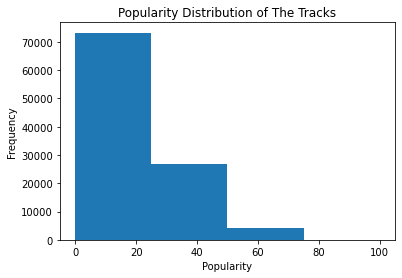

In [54]:
df['popularity'].plot(kind='hist', bins=4, range=(0,100))
plt.xlabel('Popularity')
plt.title('Popularity Distribution of The Tracks')

In [310]:
df_rock[df_rock.popularity>75]

,mxm_track_id,track_name,artist_name,genre,popularity,popularity_class,love,know,like,que,...,BALADAS Y BOLEROS,MEDITATION,MUSICALS,ARABIC POP,TRADITIONAL GOSPEL,SUFI,ARABIC,LATIN RAP,FITNESS & WORKOUT,DUB
92,727122,Bitter Sweet Symphony,The Verve,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",78.0,3,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1806,3527364,Bad Day,Daniel Powter,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",76.0,3,0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
2687,721339,Mr. Jones,Counting Crows,"[{'genre_id': 21, 'genre_name': 'Rock'}]",76.0,3,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
5198,7535508,This Love,Maroon 5,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",78.0,3,7,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6368,688216,Start Me Up (Remastered),The Rolling Stones,"[{'genre_id': 1133, 'genre_name': 'Pop/Rock'},...",76.0,3,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
12080,8804501,Toxicity,System of a Down,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",77.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14117,716947,Piano Man,Billy Joel,"[{'genre_id': 1065, 'genre_name': 'Folk-Rock'}...",76.0,3,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
15320,3293585,Wind of Change,Scorpions,"[{'genre_id': 21, 'genre_name': 'Rock'}]",78.0,3,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
16418,3726154,Highway To Hell,AC/DC,"[{'genre_id': 21, 'genre_name': 'Rock'}]",83.0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18064,4038550,Dream On,Aerosmith,"[{'genre_id': 1133, 'genre_name': 'Pop/Rock'},...",79.0,3,0,5,1,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
df_pop = df_all[df_all.POP == 1]

In [314]:
df_pop[df_pop.popularity>40]

,mxm_track_id,track_name,artist_name,genre,popularity,popularity_class,love,know,like,que,...,BALADAS Y BOLEROS,MEDITATION,MUSICALS,ARABIC POP,TRADITIONAL GOSPEL,SUFI,ARABIC,LATIN RAP,FITNESS & WORKOUT,DUB
62,9596821,Stop Stop Stop,The Hollies,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",49.0,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
92,727122,Bitter Sweet Symphony,The Verve,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",78.0,3,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
190,7012832,Shine On,The Kooks,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",48.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,2311522,Tangled up in Blue,Bob Dylan,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",65.0,2,0,5,6,0,...,0,0,0,0,0,0,0,0,0,0
223,1490463,Larger Than Life,Backstreet Boys,"[{'genre_id': 1133, 'genre_name': 'Pop/Rock'},...",67.0,2,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103861,3724398,Miss You,The Concretes,"[{'genre_id': 1133, 'genre_name': 'Pop/Rock'},...",42.0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
103934,2824035,Where Do You Go,No Mercy,"[{'genre_id': 14, 'genre_name': 'Pop'}]",60.0,2,8,13,3,0,...,0,0,0,0,0,0,0,0,0,0
103954,4334798,Tempted To Touch,Rupee,"[{'genre_id': 34, 'genre_name': 'Music'}, {'ge...",54.0,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
104023,3099961,Fragile,Sting,"[{'genre_id': 21, 'genre_name': 'Rock'}, {'gen...",63.0,2,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [312]:
df_country = df_all[df_all.COUNTRY == 1]

In [313]:
df_country[df_country.popularity>75]

,mxm_track_id,track_name,artist_name,genre,popularity,popularity_class,love,know,like,que,...,BALADAS Y BOLEROS,MEDITATION,MUSICALS,ARABIC POP,TRADITIONAL GOSPEL,SUFI,ARABIC,LATIN RAP,FITNESS & WORKOUT,DUB
52567,5354402,9 to 5,Dolly Parton,"[{'genre_id': 6, 'genre_name': 'Country'}]",76.0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [301]:
song = np.array(df_rock.loc[92, 'love':df.columns[-1]])
filename = "Models/logReg/ROCK.sav"
model = pickle.load(open(filename, 'rb'))
model.predict(song.reshape(1, -1))

array(['3'], dtype=object)